# Analisis Sentimen Pada dataset Simpson_script_lines   (NLP)

# Muhammad Ruhunul Luthfi
#  51421072
# 3IA12

In [ ]:
# Import library untuk analisis data dan pemodelan klasifikasi
import pandas as pd  # Library untuk manipulasi dan analisis data
import numpy as np   # Library untuk komputasi numerik
import nltk         # Natural Language Toolkit untuk pemrosesan teks
import seaborn as sns  # Library untuk visualisasi data statistik
import matplotlib.pyplot as plt  # Library untuk visualisasi data
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Alat analisis sentimen teks
from nltk.tokenize import word_tokenize  # Library untuk tokenisasi teks
from sklearn.feature_extraction.text import TfidfVectorizer  # Untuk vektorisasi teks dengan TF-IDF
from sklearn.model_selection import train_test_split  # Memisahkan data menjadi data pelatihan dan data uji
from sklearn.naive_bayes import MultinomialNB  # Model klasifikasi Naive Bayes
from sklearn.linear_model import LogisticRegression  # Model klasifikasi Regresi Logistik
from sklearn.pipeline import Pipeline  # Membuat aliran kerja pemrosesan data
from sklearn.metrics import classification_report, accuracy_score  # Metrik evaluasi model
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # Membuat visualisasi awan kata-kata


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/simpsons_script_lines.csv")
df.head()

,raw_character_text,normalized_text
0,Miss Hoover,no actually it was a little of both sometimes ...
1,Lisa Simpson,wheres mr bergstrom
2,Miss Hoover,i dont know although id sure like to talk to h...
3,Lisa Simpson,that life is worth living
4,Edna Krabappel-Flanders,the polls will be open from now until the end ...


In [ ]:
df.isnull().sum()

raw_character_text    17522
normalized_text       26184
dtype: int64

In [ ]:
rows_with_null = df[df.isna().any(axis=1)]

# Menampilkan baris-baris yang memiliki nilai null
print(rows_with_null)

       raw_character_text normalized_text
8                     NaN             NaN
16                    NaN             NaN
27           Bart Simpson             NaN
29                    NaN             NaN
35                    NaN             NaN
...                   ...             ...
158194                NaN             NaN
158205                NaN             NaN
158215                NaN             NaN
158243                NaN             NaN
158263                NaN             NaN

[26186 rows x 2 columns]


In [ ]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

raw_character_text    0
normalized_text       0
dtype: int64

#Pra pemrosesan teks

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Mengunduh stopwords jika belum ada
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing yang lebih mendalam
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghilangkan tanda baca
    text = "".join([char for char in text if char not in string.punctuation])
    # Menghilangkan stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Fungsi untuk menentukan label sentimen
def assign_sentiment_label_with_textblob(text):
    if pd.isna(text):
        return None
    text = preprocess_text(text)
    sentiment_polarity = TextBlob(text).sentiment.polarity
    # Mengubah threshold polaritas
    if sentiment_polarity > 0.1:
        return 'positive'
    elif sentiment_polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Aplikasi ke DataFrame
df['sentiment_label'] = df['normalized_text'].apply(assign_sentiment_label_with_textblob)
df.head(100)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,raw_character_text,normalized_text,sentiment_label
0,Miss Hoover,no actually it was a little of both sometimes ...,neutral
1,Lisa Simpson,wheres mr bergstrom,neutral
2,Miss Hoover,i dont know although id sure like to talk to h...,positive
3,Lisa Simpson,that life is worth living,positive
4,Edna Krabappel-Flanders,the polls will be open from now until the end ...,neutral
...,...,...,...
95,Homer Simpson,and is this martin guy going to get to do anyt...,positive
96,Bart Simpson,well no,neutral
97,Homer Simpson,so let the baby have his bottle huh thats my m...,neutral
98,Bart Simpson,hey thanks monkey-man,positive


# MELATIH DAN MENGUJI DATA DENGAN MEMBAGI 80% PELATIHAN DAN 20% UJI

In [ ]:
# Filter baris dengan NaN dalam kolom 'normalized_text' atau 'sentiment_label'
filtered_data = df.dropna(subset=['normalized_text', 'sentiment_label'])

# Menentukan variabel input (X) dan output (y)
X = filtered_data['normalized_text']  # Teks yang akan digunakan sebagai fitur
y = filtered_data['sentiment_label']  # Label sentimen yang ingin diprediksi

# Memisahkan data menjadi data pelatihan dan data uji (80% pelatihan, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Maksimum 5000 fitur

# Mendefinisikan model Regresi Logistik
logistic_regression_model = LogisticRegression(max_iter=1000)

# Membuat pipeline yang mengaplikasikan TF-IDF Vectorizer dan model Regresi Logistik
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),  # Langkah pertama: vektorisasi teks menggunakan TF-IDF
    ('classifier', logistic_regression_model)  # Langkah kedua: klasifikasi dengan Regresi Logistik
])
# Melatih model
pipeline.fit(X_train, y_train)

# Memprediksi pada data uji
y_pred = pipeline.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghasilkan laporan klasifikasi
report = classification_report(y_test, y_pred)

# Menampilkan hasil dengan pemformatan
print("Accuracy: {:.2f}".format(accuracy))
print("\nClassification Report:")
print(report)


Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.77      0.82      3212
     neutral       0.93      0.96      0.94     16822
    positive       0.92      0.89      0.90      6383

    accuracy                           0.92     26417
   macro avg       0.90      0.87      0.89     26417
weighted avg       0.92      0.92      0.92     26417



In [ ]:
from nltk.corpus import stopwords
from collections import Counter

# Ensure that the stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#menambah kata-kata khusus ke dalam daftar stopwords
additional_stopwords = {
    'im', 'youre', 'ill', 'thats', 'well', 'hey', 'oh', 'go', 'like',
    'just', 'really', 'said', 'told', 'got', 'was', 'were', 'can', 'will',
    'dont', 'doesnt', 'didnt', 'isnt', 'arent', 'aint', 'yeah', 'nah',
    'please', 'thank', 'maybe', 'might', 'must', 'should', 'could',
    'would', 'shall', "--", "one", ""
}  # Tambahkan kata-kata yang ingin dihilangkan
stop_words.update(additional_stopwords)

# Fungsi untuk menghilangkan kata-kata umum dari teks
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

positive_text = " ".join(remove_stopwords(text) for text in df[df['sentiment_label'] == 'positive']['normalized_text'])
negative_text = " ".join(remove_stopwords(text) for text in df[df['sentiment_label'] == 'negative']['normalized_text'])
neutral_text = " ".join(remove_stopwords(text) for text in df[df['sentiment_label'] == 'neutral']['normalized_text'])

# Fungsi untuk menghitung frekuensi kata-kata dalam teks
def get_top_words(text, top_n=10):
    word_list = text.split()
    word_freq = Counter(word_list)
    top_words = word_freq.most_common(top_n)
    return dict(top_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


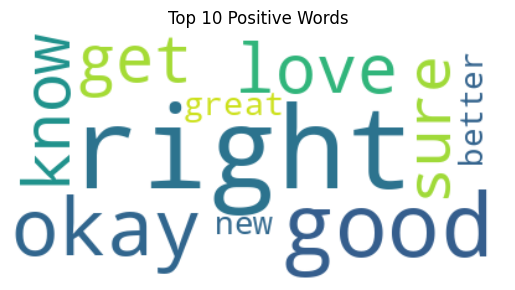

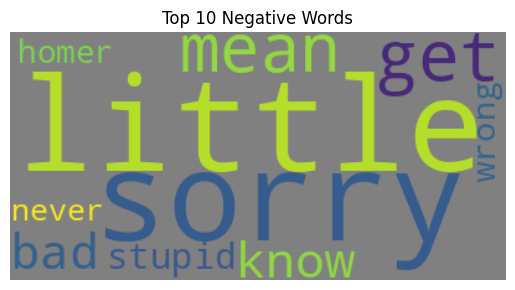

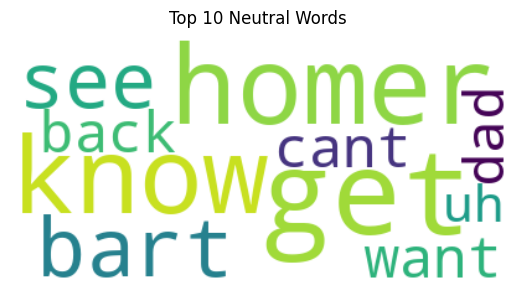

In [ ]:
# Dapatkan 10 kata teratas untuk masing-masing sentimen
top_positive_words = get_top_words(positive_text)
top_negative_words = get_top_words(negative_text)
top_neutral_words = get_top_words(neutral_text)

# Buat dan tampilkan WordCloud untuk 10 kata teratas di masing-masing sentimen
wordcloud_positive = WordCloud(background_color='white').generate_from_frequencies(top_positive_words)
wordcloud_negative = WordCloud(background_color='gray').generate_from_frequencies(top_negative_words)
wordcloud_neutral = WordCloud(background_color='white').generate_from_frequencies(top_neutral_words)

# Tampilkan WordCloud untuk sentimen positif
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Top 10 Positive Words")
plt.axis('off')
plt.show()

# Tampilkan WordCloud untuk sentimen negatif
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Top 10 Negative Words")
plt.axis('off')
plt.show()

# Tampilkan WordCloud untuk sentimen netral
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Top 10 Neutral Words")
plt.axis('off')
plt.show()

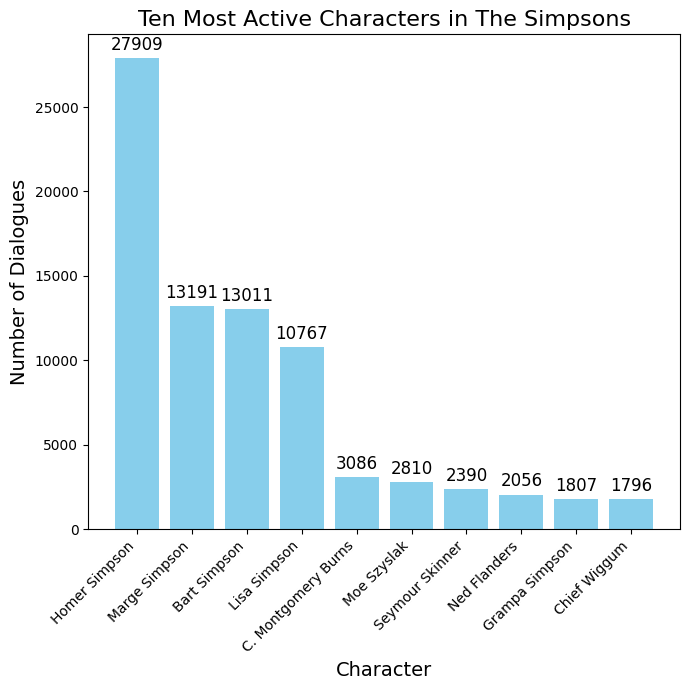

In [ ]:
dialogues_per_character = df['raw_character_text'].value_counts()

# mencari top 10 character yang sering berdialog
ten_most_active_characters = dialogues_per_character.head(10)

plt.figure(figsize=(7, 7))
bars = plt.bar(ten_most_active_characters.index, ten_most_active_characters.values, color='skyblue')

plt.title('Ten Most Active Characters in The Simpsons', fontsize=16)
plt.xlabel('Character', fontsize=14)
plt.ylabel('Number of Dialogues', fontsize=14)

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.annotate(int(yval), xy=(bar.get_x() + bar.get_width() / 2, yval), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


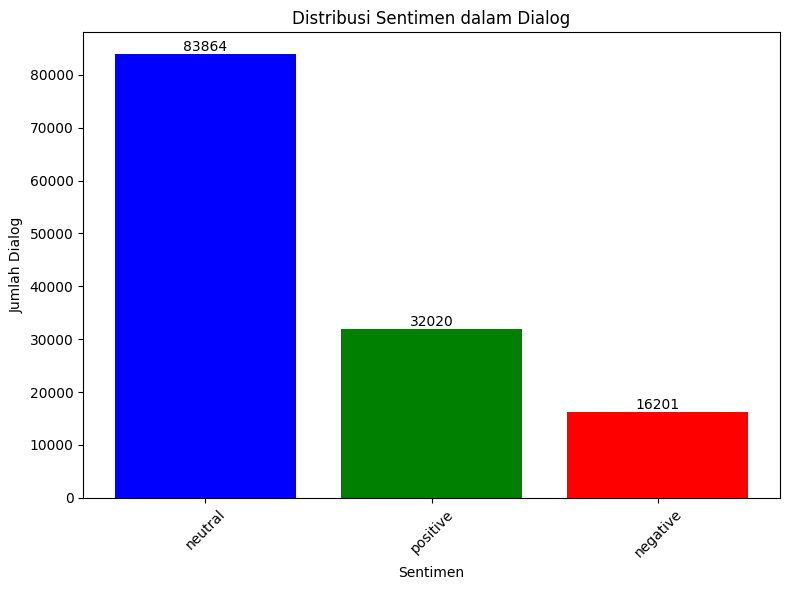

In [ ]:
sentiment_counts = df['sentiment_label'].value_counts()

# Membuat Bar Chart
plt.figure(figsize=(8, 6))  # Ukuran gambar
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'green', 'red'])

plt.title('Distribusi Sentimen dalam Dialog')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Dialog')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust subplot params untuk memberikan padding yang sesuai

# Menambahkan label pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Menampilkan grafik
plt.show()
